Date: 14 Oct 2020

Reference:
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

# 1- Multivariate Time Series

# => Vector Auto Regression (VAR)

## Stationarity of a Multivariate Time Series

like we've **Dickey-Fuller test** to check stationarity of univariate time series, similarly we have **Johansen test** to check stationarity of multivariate time series.

## Implemenation of VAR

In [287]:
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv('/home/garvit/Datasets/AirQualityUCI/AirQualityUCI.csv', header=0, delimiter=';',  parse_dates=[['Date', 'Time']])

In [289]:
df.head(3)

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004 19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004 20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN


In [290]:
df.count()

Date_Time        9471
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

In [291]:
df.tail()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
# filtering/removing/negating nan valies
df = df[~df['Date_Time'].str.contains('nan nan')]

In [293]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d/%m/%Y %H.%M.%S')
# data = .index = data['Da']
# data = df.drop(columns= ['Date_Time'], axis=1)
data = df
data.index = data['Date_Time']
data = data.drop(columns=['Date_Time'], axis=1)
data.head(4)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date_Time,,,,,,,,,,,,,,,
2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN


### Handling missing values

Handling (replacing with previous one) missing values in the data that are replaced with a value -200 from source side

In [294]:
cols = data.columns
for i in cols:
    for j in range(0, len(data)):
        if data[i][j] == -200:
            data[i][j] = data[i][j-1]

/home/garvit/anaconda3/envs/time_series/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### checking stationarity

In [295]:
len(data.columns)

15

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
 13  Unnamed: 15    0 non-null      float64
 14  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(5)
memory usage: 1.1+ MB


In [297]:
# replacing ',' with '.' and converting in float

data['C6H6(GT)'] = data['C6H6(GT)'].apply(lambda x: x.replace(',', '.')).astype(float)
data['T'] = data['T'].apply(lambda x: x.replace(',', '.')).astype(float)
data['RH'] = data['RH'].apply(lambda x: x.replace(',', '.')).astype(float)
data['AH'] = data['AH'].apply(lambda x: x.replace(',', '.')).astype(float)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
 13  Unnamed: 15    0 non-null      float64
 14  Unnamed: 16    0 non-null      float64
dtypes: float64(14), object(1)
memory usage: 1.1+ MB


In [299]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data.drop(columns=['CO(GT)', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

array([1.73518063e-01, 1.20384085e-01, 1.06001026e-01, 9.45525251e-02,
       8.70937753e-02, 6.38980450e-02, 4.37227223e-02, 3.03206976e-02,
       1.96865063e-02, 1.44202012e-02, 3.53886497e-03, 8.24216108e-05])

### train-validation set

In [300]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

### model

In [301]:
type(train)

pandas.core.frame.DataFrame

In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7485 entries, 2004-03-10 18:00:00 to 2005-01-16 14:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7485 non-null   object 
 1   PT08.S1(CO)    7485 non-null   float64
 2   NMHC(GT)       7485 non-null   float64
 3   C6H6(GT)       7485 non-null   float64
 4   PT08.S2(NMHC)  7485 non-null   float64
 5   NOx(GT)        7485 non-null   float64
 6   PT08.S3(NOx)   7485 non-null   float64
 7   NO2(GT)        7485 non-null   float64
 8   PT08.S4(NO2)   7485 non-null   float64
 9   PT08.S5(O3)    7485 non-null   float64
 10  T              7485 non-null   float64
 11  RH             7485 non-null   float64
 12  AH             7485 non-null   float64
 13  Unnamed: 15    0 non-null      float64
 14  Unnamed: 16    0 non-null      float64
dtypes: float64(14), object(1)
memory usage: 935.6+ KB


In [303]:
train = train.drop(columns=['CO(GT)', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
valid = valid.drop(columns=['CO(GT)', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [304]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

/home/garvit/anaconda3/envs/time_series/lib/python3.7/site-packages/statsmodels-0.12.0.dev0+295.gf1ea5b3f6-py3.7-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


### Making Prediction on validation data

In [305]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/garvit/anaconda3/envs/time_series/lib/python3.7/site-packages/statsmodels-0.12.0.dev0+295.gf1ea5b3f6-py3.7-linux-x86_64.egg/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


### Converting predictions to dataframe


In [306]:
cols

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [307]:
new_cols = cols[1:len(cols)-2]
new_cols

Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [308]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[new_cols])
for i in range(0,12):
    for j in range(0, len(prediction)):
       pred.iloc[j][i] = prediction[j][i]

In [309]:
pred.head(10)

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,856.239,274.397,2.55206,621.934,137.081,1117.66,89.8369,863.566,556.36,10.1905,33.0605,-0.192338
1,888.301,273.706,3.02895,660.803,157.604,1096.63,94.2247,909.602,614.966,9.0975,34.0318,-0.758105
2,915.929,272.907,3.3597,693.701,175.766,1078.47,98.155,948.471,668.015,8.10624,34.914,-1.27714
3,939.773,272,3.5697,721.578,191.785,1062.78,101.638,981.346,715.812,7.20398,35.7097,-1.75795
4,960.402,271.002,3.68095,745.247,205.881,1049.22,104.695,1009.23,758.729,6.37979,36.4234,-2.2072
5,978.305,269.935,3.71229,765.401,218.268,1037.46,107.356,1032.98,797.17,5.62436,37.0602,-2.63002
6,993.903,268.825,3.67976,782.627,229.151,1027.24,109.656,1053.31,831.546,4.92973,37.6263,-3.0304
7,1007.55,267.695,3.59689,797.418,238.717,1018.31,111.629,1070.81,862.262,4.28917,38.1277,-3.41136
8,1019.56,266.569,3.47501,810.189,247.139,1010.48,113.312,1086.01,889.704,3.6969,38.5703,-3.77523
9,1030.18,265.466,3.32353,821.286,254.569,1003.55,114.738,1099.29,914.234,3.14806,38.9602,-4.12376


In [ ]:
pred

### check rmse

In [310]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   (PT08.S1(CO),)    1872 non-null   object
 1   (NMHC(GT),)       1872 non-null   object
 2   (C6H6(GT),)       1872 non-null   object
 3   (PT08.S2(NMHC),)  1872 non-null   object
 4   (NOx(GT),)        1872 non-null   object
 5   (PT08.S3(NOx),)   1872 non-null   object
 6   (NO2(GT),)        1872 non-null   object
 7   (PT08.S4(NO2),)   1872 non-null   object
 8   (PT08.S5(O3),)    1872 non-null   object
 9   (T,)              1872 non-null   object
 10  (RH,)             1872 non-null   object
 11  (AH,)             1872 non-null   object
dtypes: object(12)
memory usage: 175.6+ KB


In [311]:
pred = pred.astype(float)

In [317]:
valid = valid.reset_index(drop=True)

In [320]:
valid.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,833.0,275.0,2.0,584.0,107.0,1144.0,80.0,821.0,463.0,11.3,32.5,0.4334
1,877.0,275.0,2.8,642.0,176.0,1037.0,112.0,859.0,565.0,11.0,33.0,0.4331
2,892.0,275.0,3.3,668.0,180.0,1017.0,121.0,872.0,632.0,10.3,35.0,0.4377
3,899.0,275.0,3.4,674.0,212.0,1002.0,132.0,893.0,691.0,8.4,40.9,0.4542
4,1008.0,275.0,7.1,861.0,331.0,839.0,160.0,977.0,943.0,8.3,38.5,0.4228


In [321]:
pred.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,856.238721,274.397287,2.552063,621.934382,137.081358,1117.664489,89.836885,863.566275,556.360305,10.190487,33.060490,-0.192338
1,888.301298,273.706459,3.028948,660.802531,157.603961,1096.632506,94.224731,909.602411,614.966208,9.097498,34.031791,-0.758105
2,915.928895,272.906655,3.359696,693.701177,175.766392,1078.469726,98.155045,948.470932,668.014800,8.106240,34.913986,-1.277138
3,939.773243,271.999948,3.569700,721.578341,191.785083,1062.781937,101.637709,981.345990,715.812214,7.203975,35.709725,-1.757954
4,960.401944,271.001923,3.680945,745.247332,205.880537,1049.216030,104.694862,1009.231276,758.729447,6.379788,36.423352,-2.207197


In [323]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Oct, 2020
Time:                     19:40:43
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    67.7932
Nobs:                     7484.00    HQIC:                   67.6985
Log likelihood:          -380418.    FPE:                2.39647e+29
AIC:                      67.6490    Det(Omega_mle):     2.34708e+29
--------------------------------------------------------------------
Results for equation PT08.S1(CO)
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   63.667792        25.039528            2.543           0.011
L1.PT08.S1(CO)           1.013968         0.015312           66.222           0.000
L1.NMHC(GT)             -0.078355         

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

for i in new_cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

# => LSTM

In [2]:
import pandas as pd
from datetime import datetime

### Basic Data Preparation

In [7]:
# load data

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = pd.read_csv('/home/garvit/Datasets/time series/pollution/raw.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)

# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)

# drop the first 24 hours
dataset = dataset[24:]

# save to file
dataset.to_csv('/home/garvit/Datasets/time series/pollution/pollution.csv')

# summarize first 5 rows
dataset.head(5)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


**Plotting each series**

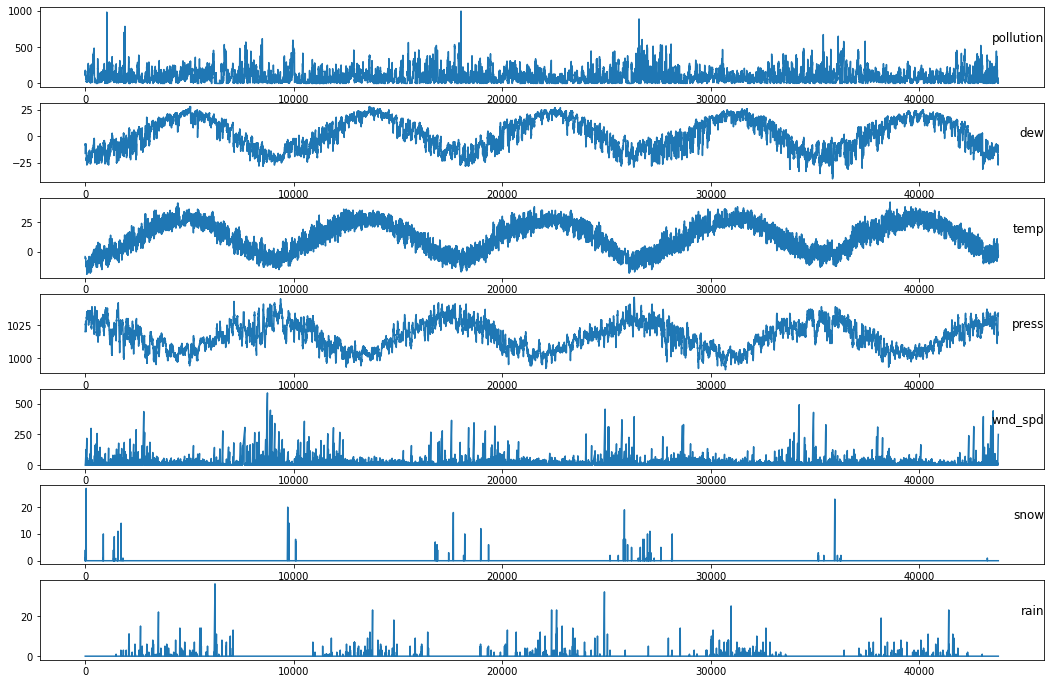

In [6]:
from pandas import read_csv
from matplotlib import pyplot

# load dataset
dataset = read_csv('/home/garvit/Datasets/time series/pollution/pollution.csv', header=0, index_col=0)
values = dataset.values

# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

# plot each column
pyplot.figure(figsize=(18, 12))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

### Multivariate LSTM Forecast Model

**LSTM Data Preparation**

In [44]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [55]:
values = dataset.values

# integer encode 'direction' feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


## Define and Fit Model

In [60]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [61]:
from matplotlib import pyplot

from keras.layers import LSTM, Dense
from keras.models import Sequential

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=False)

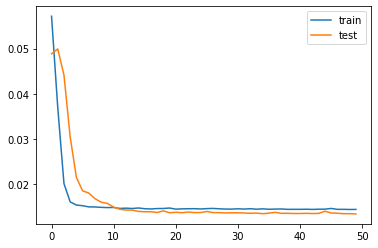

In [62]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Evaluate Model


In [63]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.398
